1. Import all the Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Read the Dataset

In [3]:
df1=pd.read_csv('Covid dataset\worldometer_data.csv')
df2=pd.read_csv('Covid dataset\country_wise_latest.csv')

3. Fill Mising Values

In [4]:
df1.fillna(0,inplace=True)
df2.fillna(0,inplace=True)

In [6]:
df1.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,0.0,41638.0,0.0,1377384.0,0.0,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,0.0,14606.0,0.0,676357.0,0.0,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,0.0,9604.0,0.0,387316.0,0.0,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


Cases per Million &&
Deaths per Million

In [9]:
df1['CasesPerMillion']=df1['Tot Cases/1M pop']
df1['DeathsPerMillion']=df1['Deaths/1M pop']

4. Get top countries based on Following Matrix

a) Total Cases

b) Total Deaths

c) Total tests


In [13]:
top_total_cases=df1.sort_values('TotalCases',ascending=False).head()
top_total_deaths=df1.sort_values('TotalDeaths',ascending=False).head()
top_total_tests=df1.sort_values('TotalTests',ascending=False).head()

# EDA (Exploratory Data Analysis)

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Ttotal Cases vs Test cases')

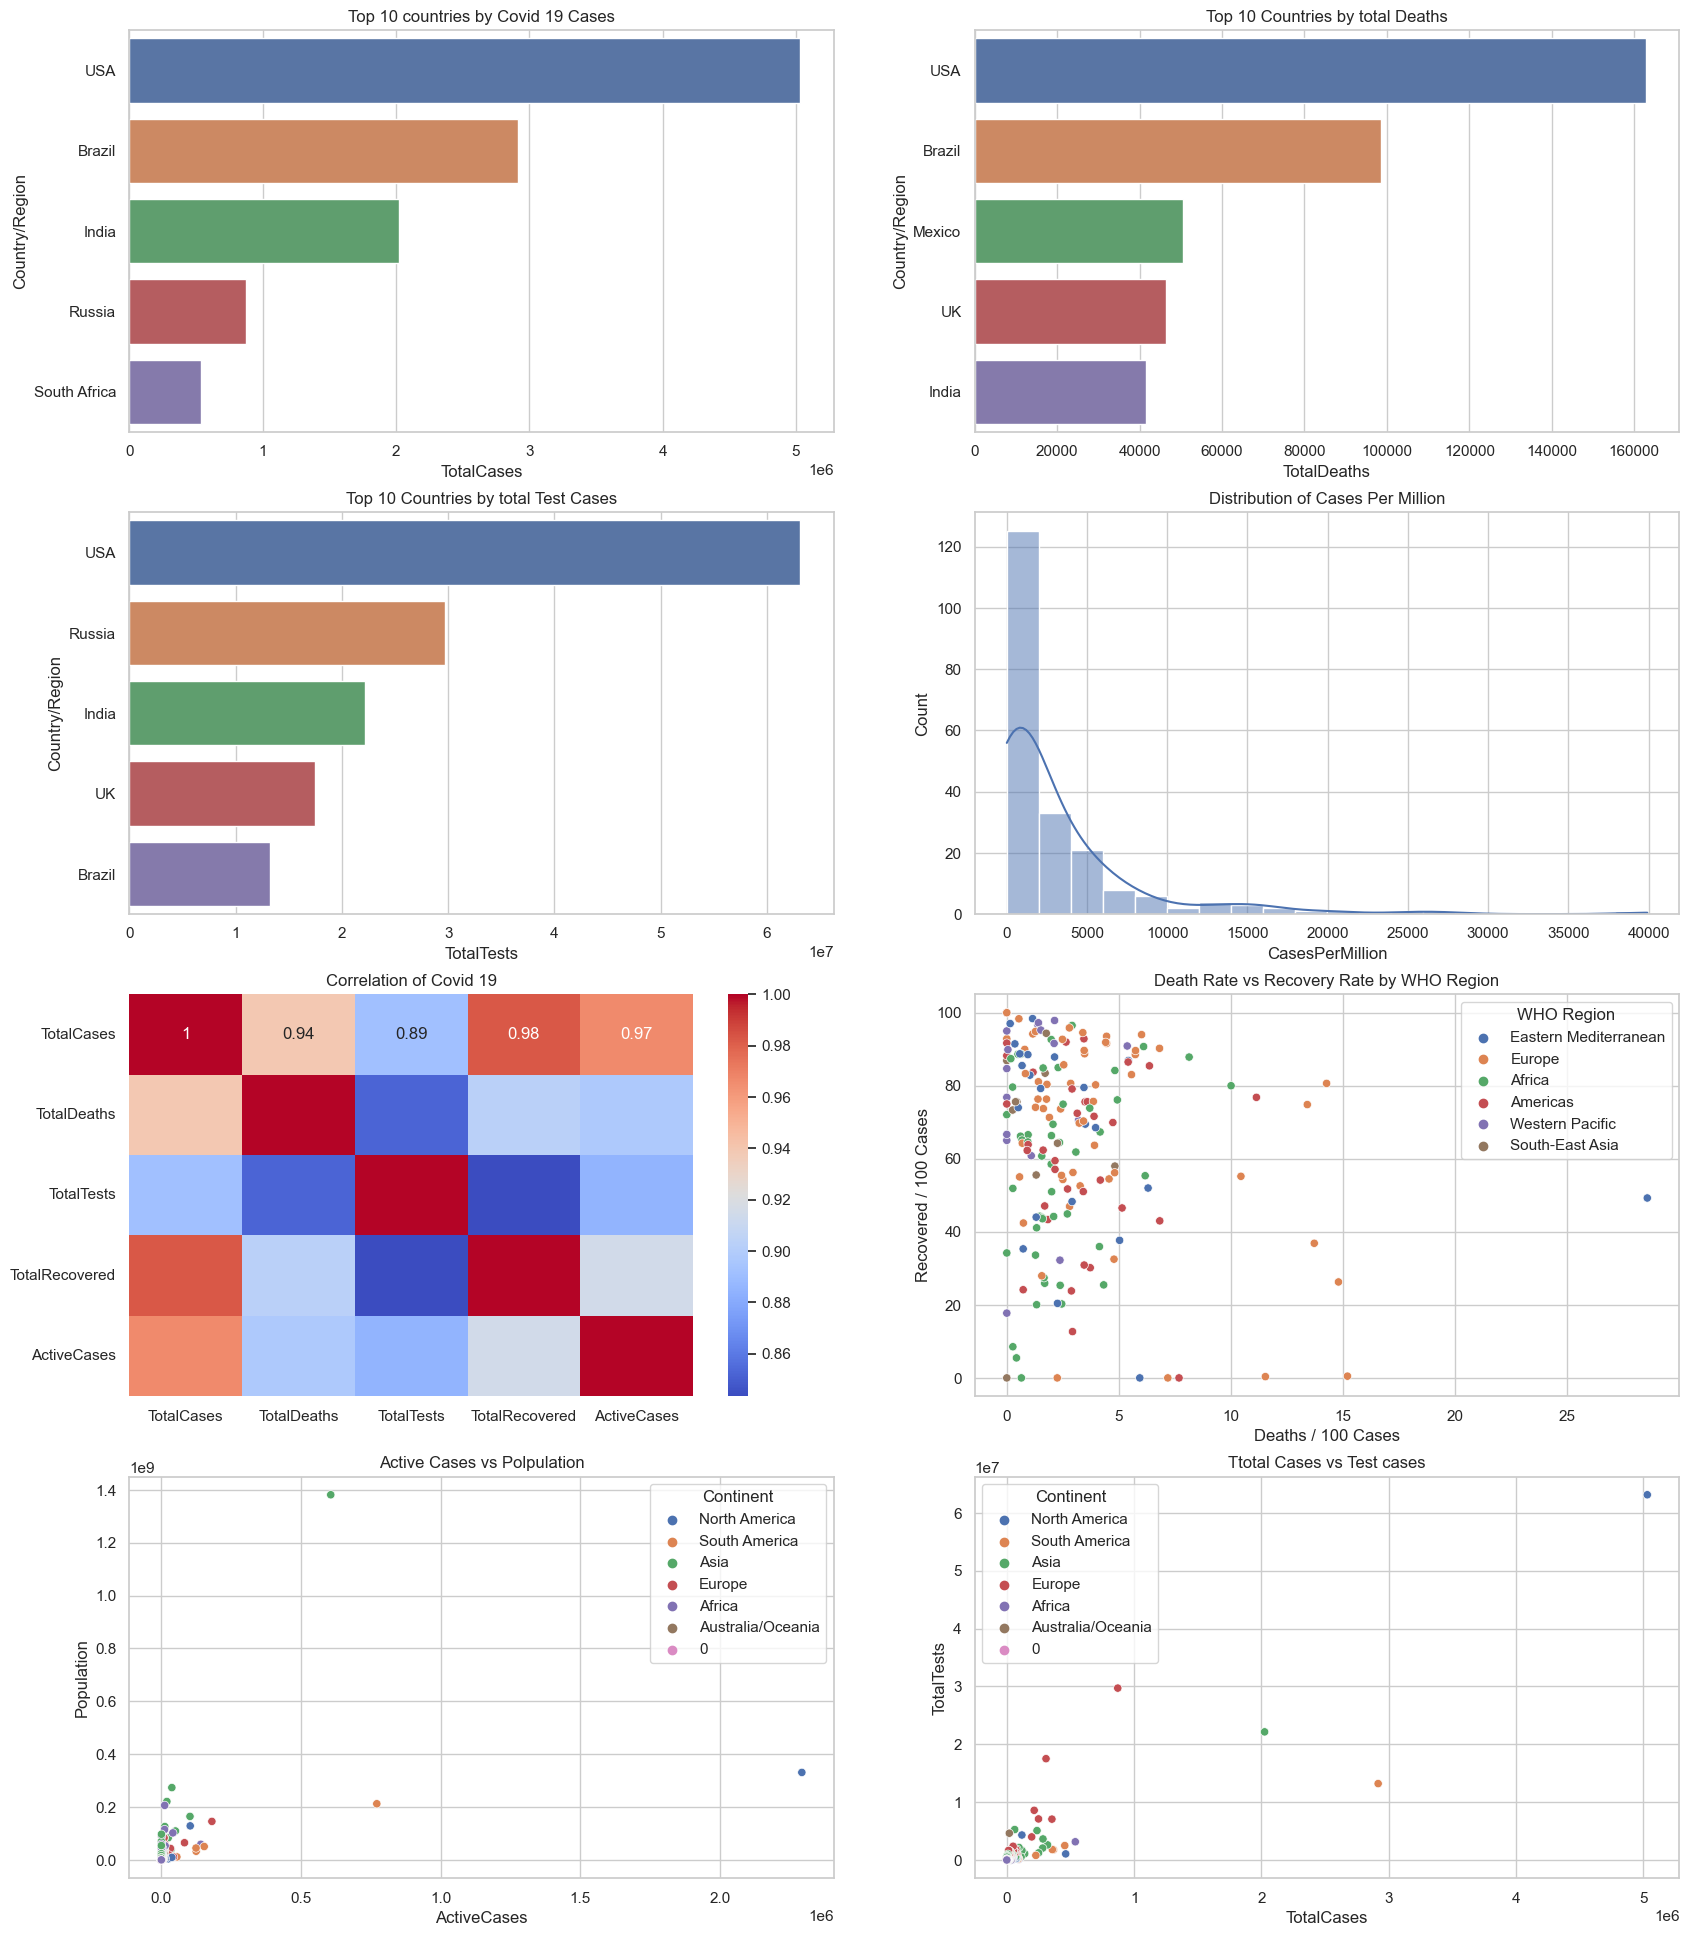

In [39]:
sns.set(style='whitegrid')
fig,ax=plt.subplots(4,2,figsize=(20,24))

# top 10 countries by total cases
sns.barplot(data=top_total_cases,x='TotalCases',y='Country/Region',ax=ax[0,0])
ax[0,0].set_title('Top 10 countries by Covid 19 Cases')

#Top 10 countries by total deaths
sns.barplot(data=top_total_deaths,x='TotalDeaths',y='Country/Region',ax=ax[0,1])
ax[0,1].set_title('Top 10 Countries by total Deaths')

#Top 10 countries by total test cases

sns.barplot(data=top_total_tests,x='TotalTests',y='Country/Region',ax=ax[1,0])
ax[1,0].set_title('Top 10 Countries by total Test Cases')

#Distribution of cases per million
sns.histplot(df1['CasesPerMillion'],bins=20,kde=True,ax=ax[1,1])
ax[1,1].set_title("Distribution of Cases Per Million")

#heat map
numeric_col=['TotalCases','TotalDeaths','TotalTests','TotalRecovered','ActiveCases']
corr=df1[numeric_col].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',ax=ax[2,0])
ax[2,0].set_title('Correlation of Covid 19')

#death vs Recovery rate
if 'Deaths / 100 Cases' in df2.columns and 'Recovered / 100 Cases' in df2.columns:
    sns.scatterplot(
        data=df2,
        x='Deaths / 100 Cases',
        y='Recovered / 100 Cases',
        hue='WHO Region',
        ax=ax[2, 1]
    )
    ax[2, 1].set_title('Death Rate vs Recovery Rate by WHO Region')
else:
    ax[2, 1].text(0.3, 0.5, 'Rate data not available in sample', fontsize=12)
    ax[2, 1].set_title('Death Rate vs Recovery Rate')
    
    
    
#Active cases vs population
sns.scatterplot(data=df1, x='ActiveCases',y='Population',hue='Continent',ax=ax[3,0])
ax[3,0].set_title('Active Cases vs Polpulation')

#Tests vs total Cases
sns.scatterplot(data=df1,x='TotalCases',y='TotalTests',hue='Continent',ax=ax[3,1])
ax[3,1].set_title('Ttotal Cases vs Test cases')
